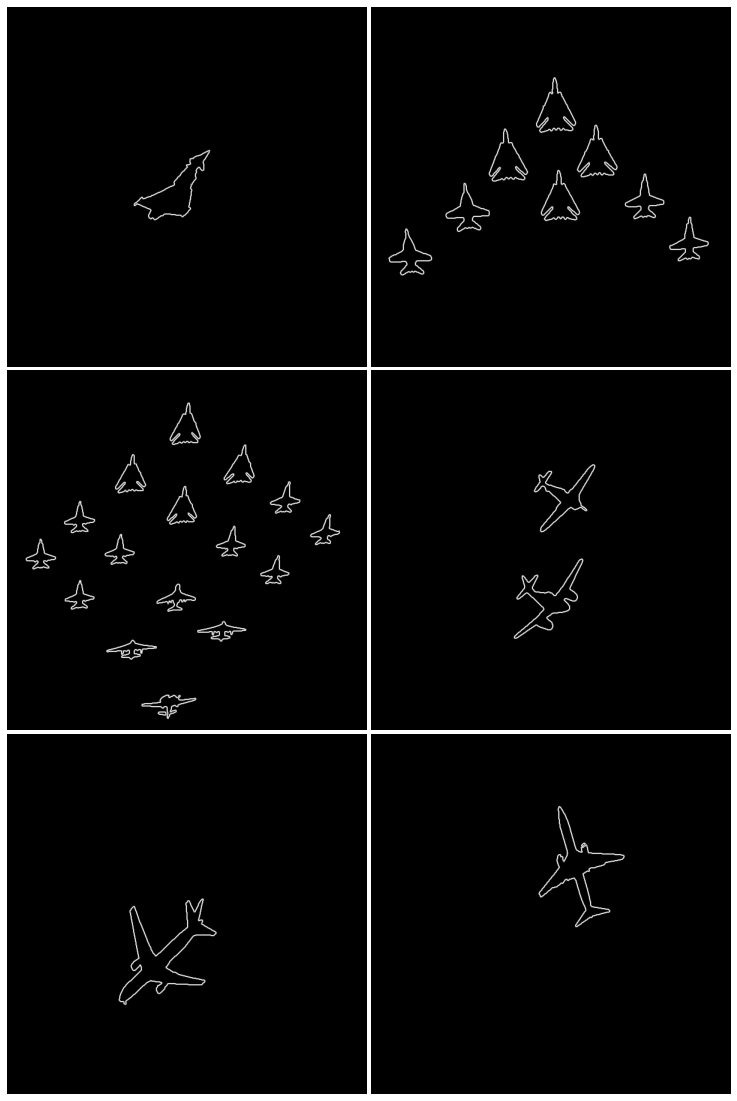

In [1]:
from skimage import img_as_ubyte, io, filters, segmentation
from skimage.color import rgb2gray
from skimage.transform import resize
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import pyplot as plt 
from scipy import ndimage as ndi
import numpy as np

def transform(image: np.ndarray) -> np.ndarray:
    elevation_map = filters.sobel(image)

    markers = np.zeros_like(image)
    markers[image < 60] = 2
    markers[image > 150] = 1
   
    transformed_image = filters.sobel(
        ndi.binary_fill_holes(
            segmentation.watershed(elevation_map, markers) - 1
        )
    )

    return transformed_image

def readImages(filenames: list, size: tuple = (600,600)) -> list:
    return [resize(img_as_ubyte(rgb2gray(io.imread(file))), size, preserve_range=True) 
            for file in filenames]


def draw(images: list, figsize: tuple, 
         nrows_ncols: tuple, axes_pad: float = 0.05) -> None:
    
    if len(images) != nrows_ncols[0] * nrows_ncols[1]:
        print("Warning: number of images (", len(images), ") does not match the shape of plot", nrows_ncols)
    
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=nrows_ncols, axes_pad=axes_pad)
    
    for ax, img in zip(grid, images):
        ax.imshow(img, cmap=plt.cm.gray)
        ax.axis('off')

    fig.savefig("plot.pdf")

def getFilenamesFromDirectory(directory: str) -> list:
    import os
    files = [directory + i for i in os.listdir(directory)]
    return files

# Recommendation - 6 images: {00, 05, 07, 09, 13, 15}
filenames = getFilenamesFromDirectory("img/")

images = readImages(filenames)
transformed_images = [transform(image) for image in images]
draw(transformed_images, figsize=(20,20), nrows_ncols=(3,2))
